<a href="https://colab.research.google.com/github/gayatrinaram/Soil-Quality-MONITORING/blob/main/Soil_Quality_Monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Image path farm uav.jpg to Image path farm uav.jpg


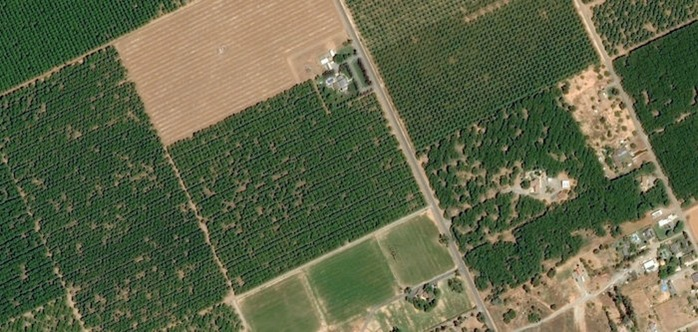

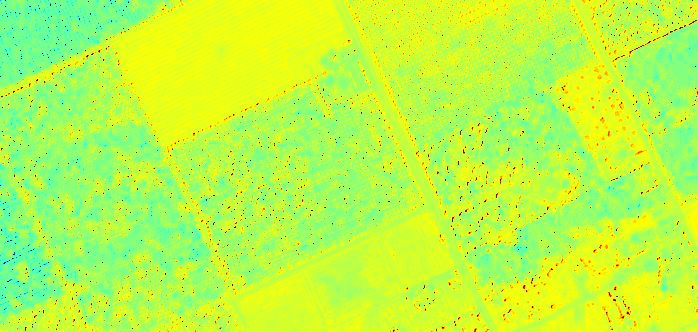

NDVI Result:
[[-0.42857143 -0.07894737 -0.03030303 ...  0.13294798  0.11111111
   0.1521739 ]
 [-0.08333334 -0.07894737 -0.03389831 ...  0.13450292  0.13
   0.20547946]
 [-0.04878049 -0.16666667 -0.04878049 ...  0.13170731  0.14285715
   0.22627737]
 ...
 [ 0.3         0.152       0.10982659 ...  0.1971831   0.18471338
   0.17682926]
 [ 0.25333333  0.16239317  0.1292517  ...  0.19310345  0.16875
   0.16167665]
 [ 0.17117117  0.1919192   0.16666667 ...  0.19310345  0.17532468
   0.16875   ]]


In [1]:
from google.colab import files
from IPython.display import Image, display
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def calculate_ndvi(img):
    img_float = img.astype(np.float32)
    blue, green, red = cv2.split(img_float)
    with np.errstate(divide='ignore', invalid='ignore'):
        numerator = np.subtract(red, blue)  # Ideally, this should be Red and NIR
        denominator = np.add(red, blue)
        ndvi = np.divide(numerator, denominator)
        ndvi = np.nan_to_num(ndvi)  # Handle NaN values

    return ndvi

# Upload an image
uploaded = files.upload()
image_path = next(iter(uploaded))

# Read the image
img = cv2.imread(image_path)
if img is None:
    raise ValueError("Image not found. Please check the uploaded file.")

# Calculate NDVI
ndvi_result = calculate_ndvi(img)

# Normalize the NDVI result for visualization
ndvi_normalized = cv2.normalize(ndvi_result, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Apply a color map to the normalized NDVI result
ndvi_colored = cv2.applyColorMap(ndvi_normalized, cv2.COLORMAP_JET)

# Display the original image
display(Image(image_path))

# Display the NDVI color image
cv2_imshow(ndvi_colored)

# Print the NDVI result
print("NDVI Result:")
print(ndvi_result)
